In [2]:
import pydotplus as dot
from pyAgrum.lib.dynamicBN import getTimeSlicesRange
from  bped2.pedigree import Pedigree
import bped2.view as pview
import pyAgrum.lib.dynamicBN as gdyn

In [3]:
ped = Pedigree()
ped.gen_ped('multi',3,2,4,2)
ped

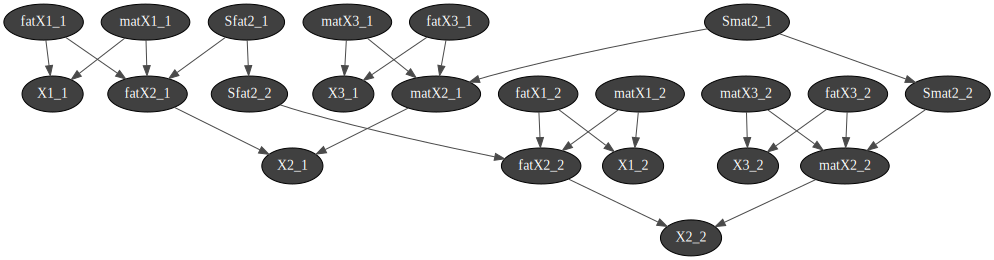

In [4]:
bn = pview.ped_to_bn_multi(ped, 0.05, 2,[0.8])
pview.gnb.showBN(bn, size=100)


In [5]:
bn.cpt('Sfat2_1')

(gum::Potential<double>@0x5625aba06750) <Sfat2_1:fat> :: 0.5 /<Sfat2_1:mat> :: 0.5

In [6]:
bn.cpt('Sfat2_2')

(gum::Potential<double>@0x5625ab7ca830) <Sfat2_2:fat|Sfat2_1:fat> :: 0.8 /<Sfat2_2:mat|Sfat2_1:fat> :: 0.2 /<Sfat2_2:fat|Sfat2_1:mat> :: 0.2 /<Sfat2_2:mat|Sfat2_1:mat> :: 0.8

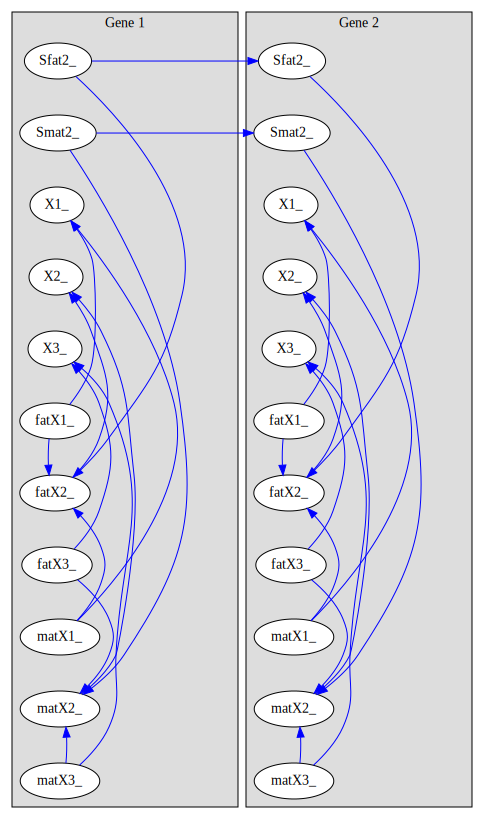

AttributeError: module 'bped2.view' has no attribute 'showTimeSlices'

In [8]:
pview.graph_multi(bn,50)
pview.showTimeSlices(bn,40)

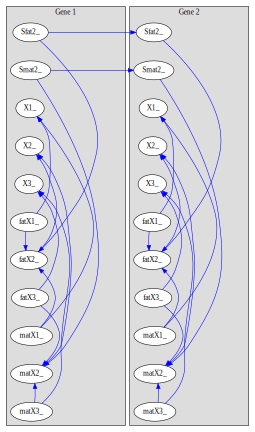

In [8]:
import pydotplus as dot

import pyAgrum as gum
from pyAgrum.lib.notebook import showGraph, getGraph
noTimeCluster = "void"

def _TimeSlicesToDot(dbn):
  """
  Try to correctly represent dBN and 2TBN in dot format
  """
  timeslices = getTimeSlicesRange(dbn)
  g = dot.Dot(graph_type='digraph')
  for k in sorted(timeslices.keys(), key=lambda x: -1 if x == noTimeCluster else 1e8 if x == 't' else int(x)):
    if k != noTimeCluster:
      cluster = dot.Cluster(k, label="Gene {}".format(
          k), bgcolor="#DDDDDD")
      g.add_subgraph(cluster)
    else:
      cluster = g  # small trick to add in graph variable in no timeslice
    for (n, label) in sorted(timeslices[k]):
      cluster.add_node(dot.Node('"'+n+'"', label='"'+label+'"', style='filled',
                                color='#000000', fillcolor='white'))

  for tail, head in dbn.arcs():
    g.add_edge(dot.Edge('"'+dbn.variable(tail).name()+'"',
                        '"'+dbn.variable(head).name()+'"',
                        constraint=False, color="blue"))

  for k in sorted(timeslices.keys(), key=lambda x: -1 if x == noTimeCluster else 1e8 if x == 't' else int(x)):
    if k != noTimeCluster:
      prec = None
      for (n, label) in sorted(timeslices[k]):
        if prec is not None:
          g.add_edge(dot.Edge('"'+prec+'"',
                              '"'+n+'"',
                              style="invis"))
        prec = n
            
  return g

def showTimeSlices(dbn, size=None):

  if size is None:
    size = gum.config["dynamicBN", "default_graph_size"]

  showGraph(_TimeSlicesToDot(dbn), size)

showTimeSlices(bn)